In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
from numpy.random import randn
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

## 日期和时间数据类型及工具

In [3]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2016, 12, 28, 20, 59, 32, 972592)

In [6]:
now.year,now.month,now.day,now.hour

(2016, 11, 7, 10)

- datetime.timedelta 两个datetime的时间差

In [7]:
#datetime 以毫秒储存日期和时间
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days,delta.seconds

(926, 56700)

In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
a=start - 2 * timedelta(12)
a,a.date(),a.time()

(datetime.datetime(2010, 12, 14, 0, 0),
 datetime.date(2010, 12, 14),
 datetime.time(0, 0))

## 字符串和datetime相互转换

In [4]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [5]:
stamp.strftime('%Y-%m-%d')
#str(stamp.date()) 同样结果

'2011-01-03'

格式：%Y 4位数的年  %y 2位数的年 %m 2位数的月[01,12],%d 2位数的日[01,31]

- 字符串转换为日期

In [22]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]
#【】不能少

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
另一种转为日期格式方法，可不用考虑字符串具体日期格式

In [6]:
from dateutil.parser import parse
parse('2016-04-08')

datetime.datetime(2016, 4, 8, 0, 0)

In [7]:
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [9]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

- DataFrame 轴索引或者列索引 pd.to_datetime

In [25]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [26]:
idx = pd.to_datetime(datestrs + [None])
idx
#可以处理缺失值

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

## 时间序列基础

In [10]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -2.706411
2011-01-05   -1.209976
2011-01-07    0.239303
2011-01-08    0.284436
2011-01-10    0.440697
2011-01-12    2.168577
dtype: float64

In [18]:
ts[datetime(2011,1,7):]

2011-01-07    0.239303
2011-01-08    0.284436
2011-01-10    0.440697
2011-01-12    2.168577
dtype: float64

In [11]:
dates1 = [(2011, 1, 2), (2011, 1, 5), (2011, 1, 7),
         (2011, 1, 8), (2011, 1, 10), (2011, 1, 12)]
ts1 = Series(np.random.randn(6), index=dates)
ts1

2011-01-02    0.151434
2011-01-05   -0.546644
2011-01-07   -0.634477
2011-01-08    0.267147
2011-01-10    0.842662
2011-01-12   -0.781836
dtype: float64

In [29]:
type(ts)

pandas.core.series.Series

In [31]:
type (ts1)

pandas.core.series.Series

In [32]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [33]:
ts1.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [12]:
ts[2]

0.23930290507886495

In [34]:
ts + ts[::2]
# 根其他Series一样，不同索引的时间序列自动按日期对齐

2011-01-02   -0.932653
2011-01-05         NaN
2011-01-07   -2.526640
2011-01-08         NaN
2011-01-10   -1.435799
2011-01-12         NaN
dtype: float64

## 索引，选取，子集的构造

In [13]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [14]:
ts[stamp]

0.23930290507886495

In [38]:
ts['1/10/2011']
#ts['20110110'] 同样

-0.71789939139962322

直接输入年或者年-月也可索引

In [15]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -1.563522
2000-01-02   -0.778092
2000-01-03   -0.312970
2000-01-04    0.267467
2000-01-05    0.267311
2000-01-06   -0.096036
                ...   
2002-09-21   -0.712343
2002-09-22    0.320341
2002-09-23    0.074604
2002-09-24   -1.037380
2002-09-25   -0.700763
2002-09-26   -0.025838
Freq: D, dtype: float64

In [40]:
longer_ts['2001']

2001-01-01    0.446665
2001-01-02   -0.313418
2001-01-03    0.185784
2001-01-04    0.357427
2001-01-05   -1.431446
2001-01-06    0.714809
                ...   
2001-12-26    1.145898
2001-12-27   -1.104112
2001-12-28    1.923852
2001-12-29   -2.021340
2001-12-30   -0.795134
2001-12-31   -0.902029
Freq: D, dtype: float64

In [41]:
longer_ts['2001-05']

2001-05-01   -2.430499
2001-05-02    0.746394
2001-05-03    1.288215
2001-05-04   -0.071250
2001-05-05   -1.484815
2001-05-06   -1.156946
                ...   
2001-05-26    0.680894
2001-05-27   -0.550083
2001-05-28    0.121128
2001-05-29   -0.864736
2001-05-30   -0.149578
2001-05-31   -1.976142
Freq: D, dtype: float64

对DataFrame上述方法依然有效

In [43]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
# periods 100个时刻 freq 周三
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.773299,-0.297076,0.870586,-0.806224
2001-05-09,0.086422,0.983277,0.010051,0.513672
2001-05-16,0.317848,1.116356,-1.520249,-1.001891
2001-05-23,-1.941813,0.068327,-0.416184,0.050922
2001-05-30,0.365627,1.228404,-0.162393,-1.144872


## 带有重复索引的时间序列

In [19]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [45]:
dup_ts['1/3/2000'] #产生标量值

4

In [46]:
dup_ts['1/2/2000']#产生切片

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [20]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
#对具有非唯一性的时间戳聚合，groupby 并且传入level=0

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [48]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

**日期范围，频率**

In [12]:
ts

2011-01-02   -0.125514
2011-01-05   -0.363276
2011-01-07    0.449381
2011-01-08   -0.579911
2011-01-10    2.304564
2011-01-12   -1.842213
dtype: float64

In [14]:
#以天的频率输出
ts.resample('D').mean()

2011-01-02   -0.125514
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.363276
2011-01-06         NaN
2011-01-07    0.449381
2011-01-08   -0.579911
2011-01-09         NaN
2011-01-10    2.304564
2011-01-11         NaN
2011-01-12   -1.842213
Freq: D, dtype: float64

日期范围

In [16]:
pd.date_range('4/1/2012', '5/1/2012')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01'],
              dtype='datetime64[ns]', freq='D')

In [21]:
#定义起始点start 默认也是起始点；截止点end
pd.date_range('4/1/2012', periods=20) 

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#每月最后一个工作日
pd.date_range('1/1/2000', '6/1/2000', freq='BM') 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [21]:
pd.date_range('1/1/2000', '6/1/2000', freq='M') 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='M')

频率

In [22]:
#每4个小时获取一次
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [23]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [24]:
#每个月的第三个星期五
pd.date_range('1/1/2016', '9/1/2016',freq='WOM-3FRI')

DatetimeIndex(['2016-01-15', '2016-02-19', '2016-03-18', '2016-04-15',
               '2016-05-20', '2016-06-17', '2016-07-15', '2016-08-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

偏移量

In [25]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.463144
2000-02-29    1.289920
2000-03-31    0.144113
2000-04-30   -0.620590
Freq: M, dtype: float64

In [26]:
#ts.shift 值偏移
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.463144
2000-04-30    1.289920
Freq: M, dtype: float64

In [27]:
ts.shift(-2)

2000-01-31    0.144113
2000-02-29   -0.620590
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [28]:
#偏移量 主要用来计算百分比变化
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.785140
2000-03-31   -0.888278
2000-04-30   -5.306279
Freq: M, dtype: float64

In [29]:
ts.shift(2, freq='M')

2000-03-31    0.463144
2000-04-30    1.289920
2000-05-31    0.144113
2000-06-30   -0.620590
Freq: M, dtype: float64

In [30]:
ts.shift(3, freq='D')
#等同于 ts.shift(1, freq='3D')

2000-02-03    0.463144
2000-03-03    1.289920
2000-04-03    0.144113
2000-05-03   -0.620590
dtype: float64

In [32]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.463144
2000-02-29 01:30:00    1.289920
2000-03-31 01:30:00    0.144113
2000-04-30 01:30:00   -0.620590
Freq: M, dtype: float64

### 时期及其算术运算

In [34]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [35]:
p + 5

Period('2012', 'A-DEC')

In [36]:
pd.Period('2014', freq='A-DEC') - p

7

In [39]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

period_range与date_range 差异性

In [40]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [41]:
rng = pd.date_range('1/1/2000', '6/30/2000', freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30'],
              dtype='datetime64[ns]', freq='M')

时间频率转化

In [47]:
# 年度时期，转换为当年年初或年末的一个月度时期
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start') 
#A-DEC 为分割点

Period('2007-01', 'M')

In [44]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [45]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [46]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [48]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [6]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.201242
2007    0.165537
2008    1.446169
2009    1.619031
Freq: A-DEC, dtype: float64

In [8]:
ts.asfreq('M',how= 'start')

2006-01   -0.201242
2007-01    0.165537
2008-01    1.446169
2009-01    1.619031
Freq: M, dtype: float64

In [51]:
ts.asfreq('B', how='end')

2006-12-29    1.789349
2007-12-31   -1.557020
2008-12-31    0.971052
2009-12-31   -0.613472
Freq: B, dtype: float64

In [4]:
p = pd.Period('2012Q4', freq='Q-JAN')
p
#以1月份结尾，2012Q4表示从11月-1月 

Period('2012Q4', 'Q-JAN')

In [5]:
p.asfreq('D',how='start')

Period('2011-11-01', 'D')

In [9]:
p.asfreq('D',how='end')

Period('2012-01-31', 'D')

In [10]:
p.asfreq('B',how='end')-1

Period('2012-01-30', 'B')

获取该季度倒数第二天下午4点的时间戳

In [14]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') +16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [15]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Timestamp 与Period 相互转换

In [16]:
rng=pd.date_range('1/1/2000', periods=3, freq='M')
ts=Series(randn(3),index=rng)
pts=ts.to_period()

In [17]:
ts

2000-01-31    0.349155
2000-02-29   -0.372029
2000-03-31   -0.302016
Freq: M, dtype: float64

In [18]:
pts

2000-01    0.349155
2000-02   -0.372029
2000-03   -0.302016
Freq: M, dtype: float64

In [20]:
pts.to_timestamp()

2000-01-01    0.349155
2000-02-01   -0.372029
2000-03-01   -0.302016
Freq: MS, dtype: float64

In [21]:
pts.to_timestamp(how='end')

2000-01-31    0.349155
2000-02-29   -0.372029
2000-03-31   -0.302016
Freq: M, dtype: float64

In [19]:
#时间戳和时期可以是不同的单位
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01   -0.364172
2000-01    0.963247
2000-01   -0.881373
2000-02    0.589187
2000-02   -0.192481
2000-02    0.288678
Freq: M, dtype: float64

### 示例

In [22]:
data = pd.read_csv('c\ch08/macrodata.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
year        203 non-null float64
quarter     203 non-null float64
realgdp     203 non-null float64
realcons    203 non-null float64
realinv     203 non-null float64
realgovt    203 non-null float64
realdpi     203 non-null float64
cpi         203 non-null float64
m1          203 non-null float64
tbilrate    203 non-null float64
unemp       203 non-null float64
pop         203 non-null float64
infl        203 non-null float64
realint     203 non-null float64
dtypes: float64(14)
memory usage: 22.3 KB


年度和季度放在不同列中，合并为一个索引

In [25]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index[:10]

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2'],
            dtype='int64', freq='Q-DEC')

In [27]:
data.index = index
data.infl[:10]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
Freq: Q-DEC, Name: infl, dtype: float64

### 重采样及频率转化（重采样是时间序列从一个频率转换到另一个频率，高频到低频就是降采样）

In [29]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()
#降采样

2000-01-31   -0.066604
2000-02-29    0.233825
2000-03-31    0.242406
2000-04-30    0.104519
Freq: M, dtype: float64

In [31]:
ts.resample('M', kind='period').mean()

2000-01   -0.066604
2000-02    0.233825
2000-03    0.242406
2000-04    0.104519
Freq: M, dtype: float64

### 降采样

In [32]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

- ** resample求和的方式数据聚合到5分钟内**

In [37]:
ts.resample('5min',label='right').sum()
#label,closed 默认都是左边

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int32

In [38]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

- ** OHLC重采样  （open 开盘 close 收盘 high 最高 low 最低）**

In [39]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


- ** 通过groupby重采样**

In [40]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)

根据月份重采样

In [42]:
ts.groupby(lambda x : x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [44]:
ts.groupby(lambda x: x.weekday).mean() #根据星期重采样

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 升采样和差值

In [45]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.707232,0.623068,-0.031637,1.415843
2000-01-12,-0.704463,-1.002860,0.643509,0.232074


重采样到日频率

In [47]:
df_daily = frame.resample('D').mean()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.707232,0.623068,-0.031637,1.415843
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.704463,-1.002860,0.643509,0.232074


In [50]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.707232,0.623068,-0.031637,1.415843
2000-01-06,-1.707232,0.623068,-0.031637,1.415843
2000-01-07,-1.707232,0.623068,-0.031637,1.415843
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.704463,-1.002860,0.643509,0.232074


In [53]:
frame.resample('W-THU').mean()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.707232,0.623068,-0.031637,1.415843
2000-01-13,-0.704463,-1.002860,0.643509,0.232074


- **通过时期进行重采样**

In [54]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.152019,-2.083137,0.250777,-1.430854
2000-02,-0.655250,-0.765781,0.467561,0.228116
2000-03,0.489671,0.588508,0.527823,2.130946
2000-04,0.624814,2.384211,-0.107268,0.606999
2000-05,0.472480,0.939381,0.699113,-0.139630


In [56]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.082059,0.199653,0.029748,0.195277
2001,-0.403840,0.248920,0.319822,0.139203


In [59]:
annual_frame.resample('Q-DEC').mean() 
#升序默认赋值给第一个分量

,Colorado,Texas,New York,Ohio
2000Q1,-0.082059,0.199653,0.029748,0.195277
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,-0.403840,0.248920,0.319822,0.139203
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [66]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.082059,0.199653,0.029748,0.195277
2001Q1,-0.082059,0.199653,0.029748,0.195277
2001Q2,-0.082059,0.199653,0.029748,0.195277
2001Q3,-0.082059,0.199653,0.029748,0.195277
2001Q4,-0.403840,0.248920,0.319822,0.139203


### 时间序列绘图

#### 移动加权平均

In [4]:
close_px_all = pd.read_csv('c/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


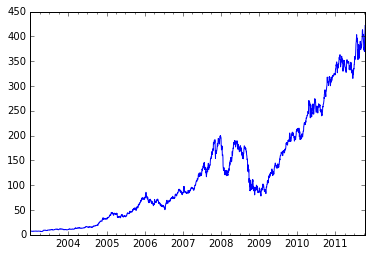

In [6]:
close_px['AAPL'].plot()

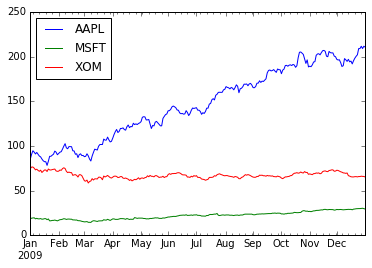

In [7]:
#对DataFrame调用plot时，所有时间序列都绘制在一个subplot上
close_px.ix['2009'].plot()

AAPL2011-01到2011-03月的股价

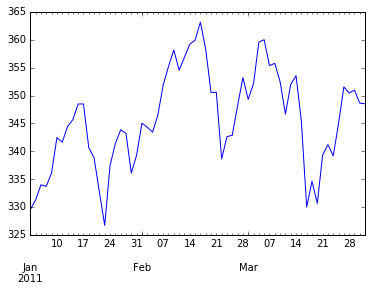

In [10]:
close_px['AAPL'].ix['2011-01':'2011-03'].plot()

In [11]:
close_px1 = close_px['AAPL'].resample('Q-DEC').ffill()

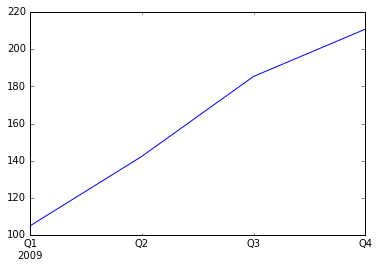

In [12]:
close_px1.ix['2009'].plot()

AAPL公司250日均线 rolling

In [17]:
close_px = close_px.asfreq('B').ffill()

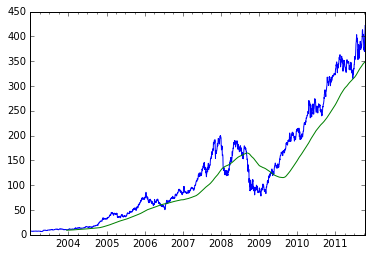

In [20]:
close_px.AAPL.plot()
close_px['AAPL'].rolling(window=250).mean().plot()

苹果公司250日每日回报标准差

In [31]:
appl_std250=close_px['AAPL'].rolling(window=250,min_periods=5).std()

In [32]:
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08    0.071204
2003-01-09    0.068532
2003-01-10    0.063696
2003-01-13    0.063569
2003-01-14    0.065000
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

通过rolling_mean 进行扩展，不设置值为空

In [33]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

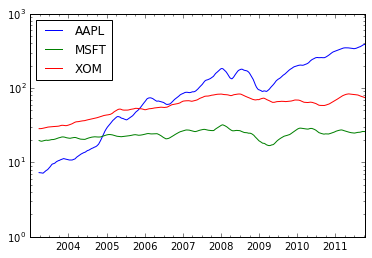

In [36]:
#个股60日均价（对数Y轴）
close_px.rolling(window=60).mean().plot(logy=True)

#### 指数加权平均

赋予近期观测值更大的权数，苹果公司 span=60的60日均线

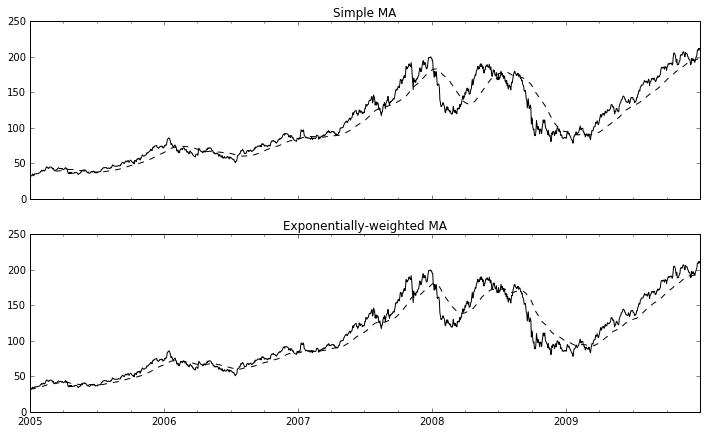

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(window=60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

#### 二元移动窗口函数  如相关系数需要在两个时间序列执行

某个变量与参考量相关系数，可以计算变量百分数在rolling_corr

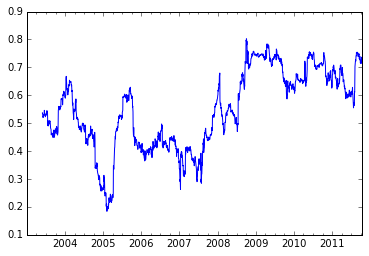

In [46]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns['AAPL'].rolling(window=125, min_periods=100).corr(spx_rets)
corr.plot()

In [42]:
spx_px / spx_px.shift(1) - 1
#等同于spx_px.pct_change()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
2003-01-09    0.019386
                ...   
2011-10-07   -0.008163
2011-10-10    0.034125
2011-10-11    0.000544
2011-10-12    0.009795
2011-10-13   -0.002974
2011-10-14    0.017380
Name: SPX, dtype: float64

#### 用户定义移动窗口函数

AAPL2%百分等级

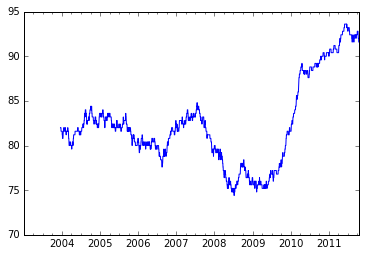

In [48]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns['AAPL'].rolling(window=250).apply(score_at_2percent)
result.plot()

In [17]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

In [18]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [19]:
#np.take 取序列号对应的值
ticker_subset = tickers.take(np.random.permutation(N)[:1000])
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
port.head()

ABBGV    0.996669
HDTMN   -0.478245
LGGIV    1.167554
FAOZI    1.169589
PYNAO    1.797582
dtype: float64

In [20]:
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [24]:
#如果只想关注某一个变量与其余变量的相关系数的话，可以使用corrwith
factors.corrwith(port)
#各个因子与投资组合的矢量相关性几乎无意义

f1    0.387758
f2   -0.688276
f3    0.153730
dtype: float64

#### 计算因子暴露的标准方式是最小二乘回归法

In [40]:
import statsmodels.api as sm
res=sm.OLS(port, factors).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     930.0
Date:                Mon, 14 Nov 2016   Prob (F-statistic):          2.51e-288
Time:                        11:57:58   Log-Likelihood:                -313.42
No. Observations:                1000   AIC:                             632.8
Df Residuals:                     997   BIC:                             647.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
f1             0.9890      0.031     32.319      0.0

In [41]:
pd.ols(y=port, x=factors).beta

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.676451
f2          -1.168754
f3           0.279479
intercept    0.509109
dtype: float64

计算各行业的暴露量

In [26]:
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [27]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')

In [30]:
by_ind=port.groupby(industries)
exposures=by_ind.apply(beta_exposure,factors=factors)
exposures.unstack()

C:\Anaconda3\lib\site-packages\pandas\core\groupby.py:647: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  return func(g, *args, **kwargs)


,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.723729,-1.186432,0.302444,0.481304
TECH,0.620982,-1.145786,0.254824,0.538447


### 十分位数和四分位分析

pandas.qcut() groupby 实现

In [46]:
import pandas.io.data as web
data = web.get_data_yahoo('SPY', '2006-01-01','2012-07-27')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2006-01-03 to 2012-07-27
Data columns (total 6 columns):
Open         1655 non-null float64
High         1655 non-null float64
Low          1655 non-null float64
Close        1655 non-null float64
Volume       1655 non-null int64
Adj Close    1655 non-null float64
dtypes: float64(5), int64(1)
memory usage: 90.5 KB


In [47]:
px = data['Adj Close']
returns = px.pct_change()

In [59]:
# get_loc 得到整数位置标签 idxmax 最大值的索引
def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

In [65]:
def trend_signal(rets, lookback, lag):
    signal = rets.rolling( min_periods=lookback - 5,window=lookback).sum()
    return signal.shift(lag)

- 每周五动量信号进行交易的交易

In [66]:
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
#每周五为聚集，再分布成工作日，向前填充
trade_rets = trade_friday.shift(1) * returns
#向后移一位然后乘百分比，当前时间日期和值
trade_rets = trade_rets[:len(returns)]
#序列数与原函数一致 

In [74]:
a=returns.rolling( min_periods=95,window=100).sum()
a[:97]

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
                ...   
2006-05-15         NaN
2006-05-16         NaN
2006-05-17         NaN
2006-05-18         NaN
2006-05-19    0.008878
2006-05-22    0.001246
Name: Adj Close, dtype: float64

In [77]:
trade_friday

Date
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
2006-01-11         NaN
2006-01-12         NaN
2006-01-13         NaN
                ...   
2012-07-20    0.004223
2012-07-23    0.004223
2012-07-24    0.004223
2012-07-25    0.004223
2012-07-26    0.004223
2012-07-27    0.005242
Freq: B, Name: Adj Close, dtype: float64

In [80]:
trade_friday.shift(1)*returns

Date
2006-01-03             NaN
2006-01-04             NaN
2006-01-05             NaN
2006-01-06             NaN
2006-01-09             NaN
2006-01-10             NaN
                  ...     
2012-07-20   -1.825045e-04
2012-07-23   -4.270114e-05
2012-07-24   -3.626034e-05
2012-07-25    9.463097e-07
2012-07-26    6.966449e-05
2012-07-27    7.783722e-05
Name: Adj Close, dtype: float64

In [113]:
a=(1 + trade_rets).cumprod()

In [106]:
max(a.index.get_loc(a.idxmax())-1,0)

828

In [107]:
a.idxmax()

Timestamp('2009-03-09 00:00:00')

In [108]:
a.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-16',
               ...
               '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27',
               '2012-04-30', '2012-05-01', '2012-05-02', '2012-05-03',
               '2012-05-04', '2012-05-07'],
              dtype='datetime64[ns]', name='Date', length=1655, freq=None)

In [114]:
a.values[826] 

1.0818559723407126

In [101]:
first_loc = max(a.index.get_loc(a.idxmax()) - 1, 0)
a.values[first_loc] = 1

In [104]:
a['2009-03-09']

1.1001028660205092

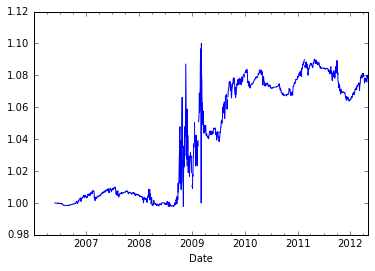

In [60]:
to_index(trade_rets).plot()

### 信号前言分析

In [49]:
import pandas.io.data as web
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = DataFrame({n: get_px(n, None, None) for n in names})

#### 每只股票的累计收益率

In [50]:
px = px.asfreq('B').ffill()#前值填充空值 fillna(method='pad') 一致

In [51]:
rets=px.pct_change()
rets.head()

,AAPL,BAC,C,DELL,GOOG,GS,MS,MSFT
Date,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.032505,0.038235,0.022696,-0.004404,0.017680,0.036558,0.000323
2010-01-06,-0.015906,0.011728,0.031162,-0.019502,-0.025209,-0.010673,0.012797,-0.006137
2010-01-07,-0.001849,0.032947,0.002747,0.009602,-0.023280,0.019568,0.014484,-0.010400
2010-01-08,0.006648,-0.008860,-0.016438,0.008832,0.013331,-0.018911,-0.020352,0.006897


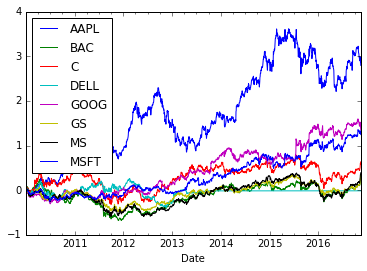

In [53]:
((1 + rets).cumprod() - 1).plot()

股价降序排列并标准化函数 不是很理解

In [54]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

指定回顾期和持有期，计算投资组合整体的夏普比例

In [57]:
compound = lambda x : (1 + x).prod() - 1 #按指定轴，元素相乘
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # 计算投资组合权重
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # 计算投资组合收益
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [58]:
strat_sr(px,70,30)

-0.16824651624633119

In [59]:
from collections import defaultdict
# defaultdict 可以放入工厂函数
#http://www.pythontab.com/html/2013/pythonjichu_1023/594.html

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

In [60]:
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

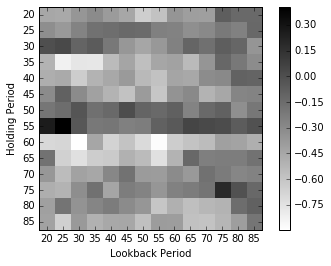

In [61]:
heatmap(ddf)

In [5]:
help(strat_sr)

NameError: name 'strat_sr' is not defined

In [7]:
np.ones((10,5)).shape

(10, 5)